<a href="https://colab.research.google.com/github/manokaran86/Computer_Vision/blob/Master/Image_edge_detection_using_Kernels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Exploring Different types of filters**

##### **Importing necessary libraries**

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

###<font color=green> **File and Library setup**

In [ ]:
# Getting the current path
import os
current_path = os.getcwd()
print(current_path)

/content


In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###<font color=green>  **Importing Image and displaying details**

In [ ]:
# Setting up file path to get image file
image_path = '/content/drive/My Drive/Git_Hub_projects/computer_vision/Edge Detection and Kernels/tesla.jpg'

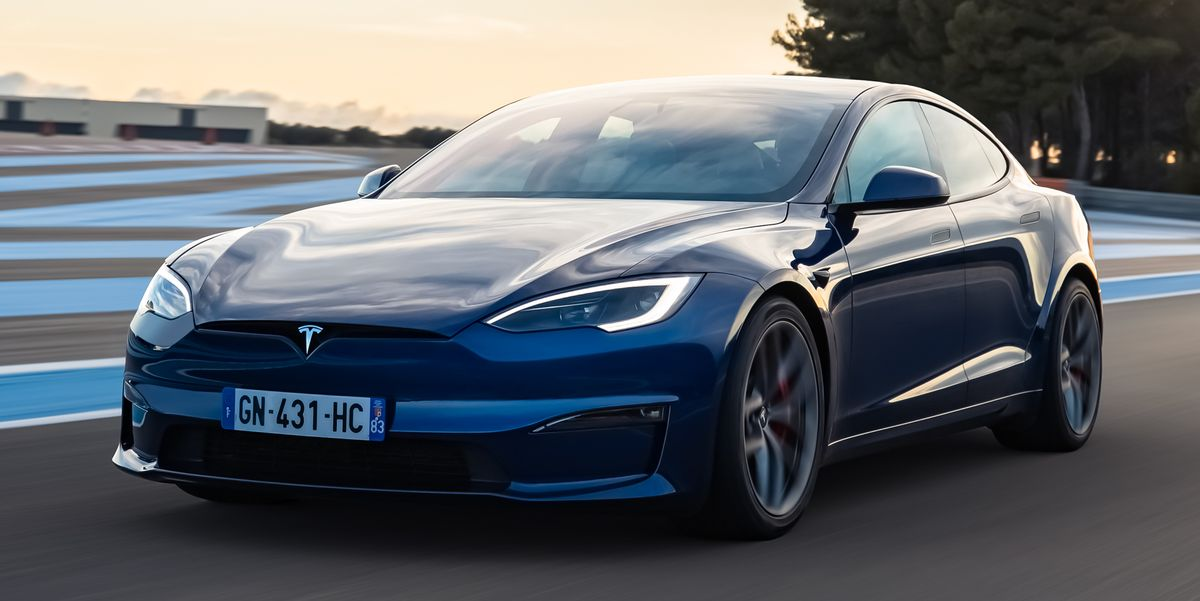

In [ ]:
car = cv2.imread(image_path)
cv2_imshow(car)

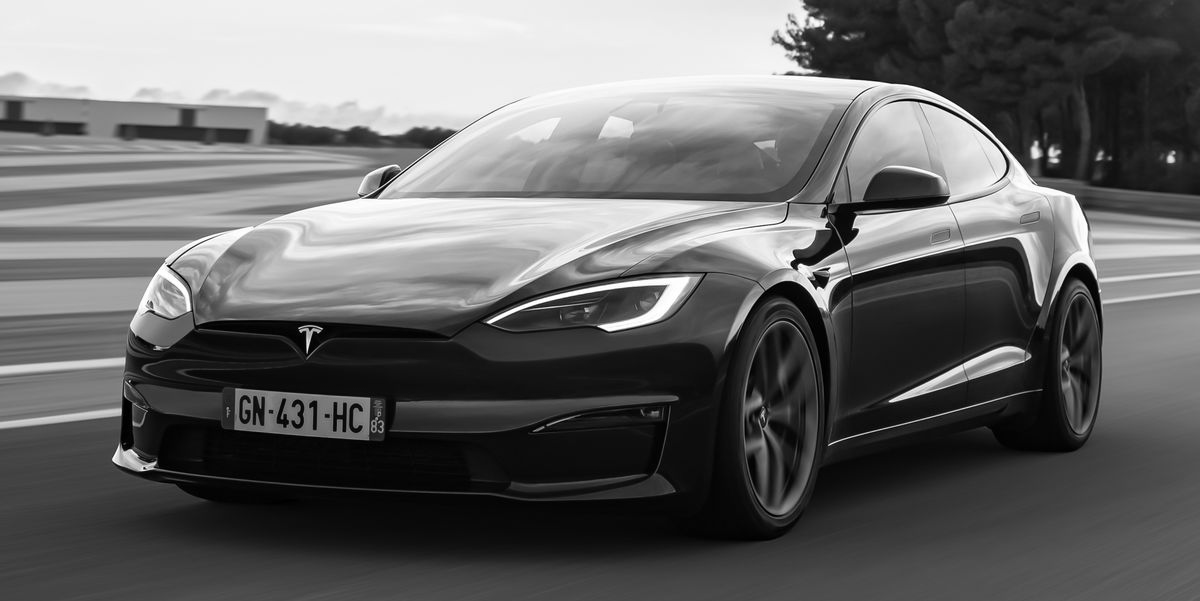

In [ ]:

# Convert the color image to grayscale
car_grayscale = cv2.cvtColor(car, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
cv2_imshow(car_grayscale)


In [ ]:
kernel_x = np.array([[-1,-1,-1],[0,0,0],[1,1,1]]) # Horizontal Edge Detector
kernel_y = np.array([[-1,0,1],[-1,0,1],[-1,0,1]]) # Vertical Edge Detector
print("Horizontal Edge Detector:")
print(kernel_x)
print("Vertical Edge Detector:")
print(kernel_y)

Horizontal Edge Detector:
[[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]
Vertical Edge Detector:
[[-1  0  1]
 [-1  0  1]
 [-1  0  1]]


### **Prewitt Filter**

In [ ]:
prewitt_x=cv2.filter2D(car,-1,kernel_x) # Convolution operation for the input image with the Horizontal Edge Detector
prewitt_y=cv2.filter2D(car,-1,kernel_y) # Convolution operation for the input image with the Vertical Edge Detector

prewitt_xy= cv2.bitwise_or(prewitt_x,prewitt_y) # Combining both edge detectors

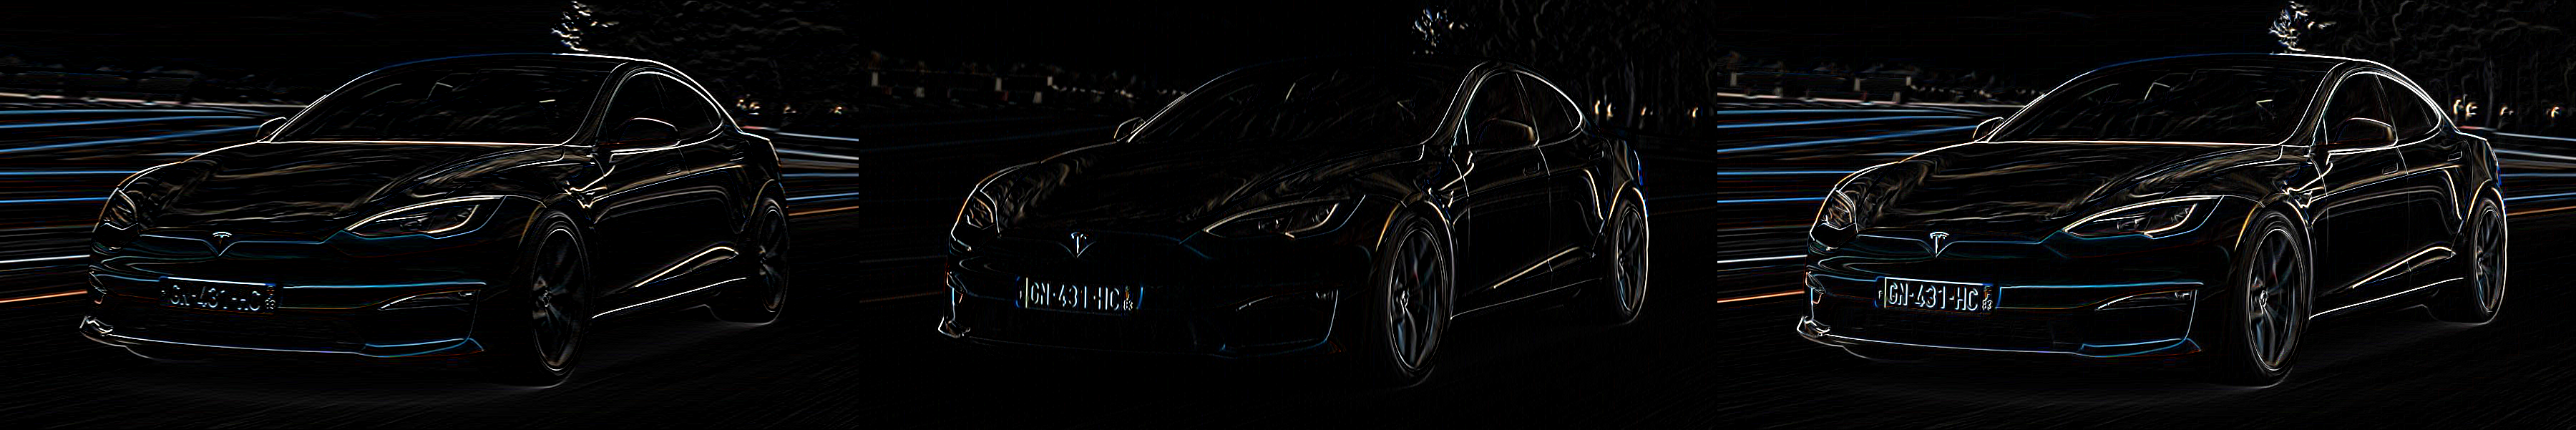

In [ ]:
frame_prewitt=cv2.hconcat((prewitt_x,prewitt_y,prewitt_xy)) # Concatenating the images
cv2_imshow(frame_prewitt) # Visualizing the results

In the above images:

- **First image on left-side - Horizontal Prewitt Filter**, - horizontal edges shapes of the car.

- **Second Image-Vertical Prewitt Filter**, vertical edges of the car image are visible.

- **Third images is Bitwise OR combination of the two kernel outputs**, - Combination of both Horizontal and vertical


### **Sobel Filter**

In [ ]:
# Sobel Edge Detection
sobelx = cv2.Sobel(src=car, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3) # Sobel Edge Detection on the X axis used for vertical edge detection
sobely = cv2.Sobel(src=car, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3) # Sobel Edge Detection on the Y axis used for horizontal edge detection

sobelxy = cv2.bitwise_or(sobelx,sobely) # Combined X and Y Sobel Edge Detection

/usr/local/lib/python3.10/dist-packages/google/colab/patches/__init__.py:18: RuntimeWarning: invalid value encountered in cast
  a = a.clip(0, 255).astype('uint8')


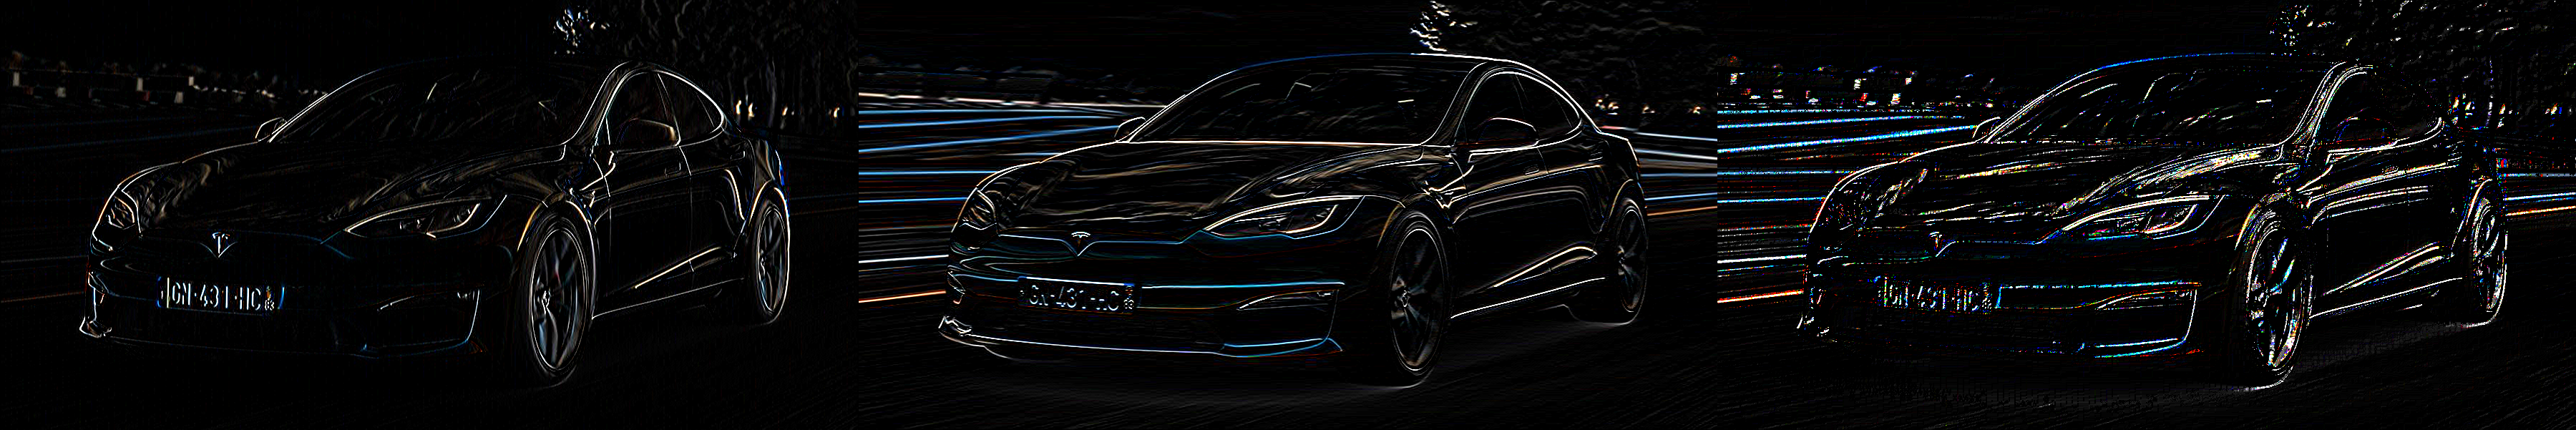

In [ ]:
sobel_image=cv2.hconcat((sobelx,sobely,sobelxy)) # Concatenating the images
cv2_imshow(sobel_image) # Visualizing the results

First Image -  Sobel vertical edge detector
Middle - Sobel horizontal edge detector
Right - Image on the right is a combination of the two.

 **the Sobel edge detector finds more edges in the image in comparison to Prewitt.** This is the implication of the change where **we allotted more weight to the central edge values** in the kernels for the Sobel filter.

### **The Laplacian Filter**

Laplacian Filter works by **highlighting those regions where the gradient of pixel intensities changes abruptly.** Unlike the Sobel edge detector,the Laplacian edge detector **uses only one kernel.**

**OpenCV also directly provides the Laplacian function.** The parameters it takes are:


*   **src -** Input image
*   **ddepth -** The depth of the output image.In our code we are using CV_64F means 64 bit floating point.


In [ ]:
laplacian=cv2.Laplacian(car,cv2.CV_64F)

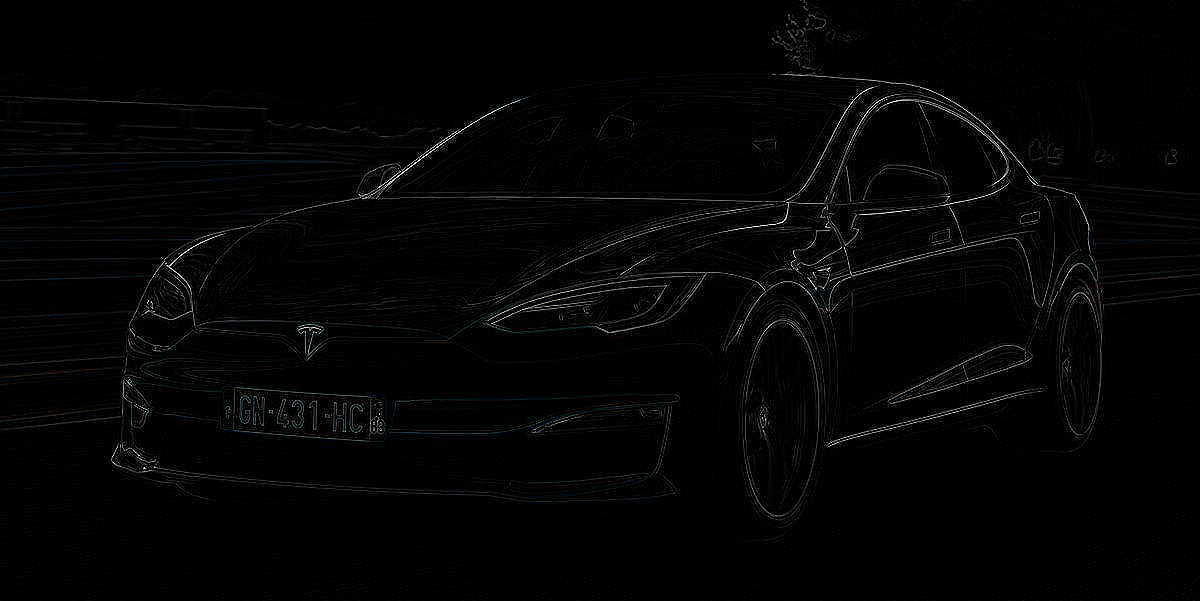

In [ ]:
cv2_imshow(laplacian)